In [ ]:
import torch as tc
from torch import nn # contains all the building blocks for the neural networks
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from torch import optim


In [ ]:
X = tc.arange(0,1,0.02).unsqueeze(dim=1)
weight = 0.7
bias = 0.3

y = bias + X * weight
y

In [ ]:
# Creating the train and test split
tr_split = int(0.8*len(X))

X_train,X_test, y_train, y_test = X[:tr_split], X[tr_split:], y[:tr_split], y[tr_split:]

In [ ]:
# Creating the visualizations for the datapoints

def Visualize(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, preds = None):
    try:
        plt.clf()
    except:
        pass
    
    plt.figure(figsize=(6,4))

    plt.scatter(train_data, train_labels, c = 'b', s = 5, label = "Training Data")
    plt.scatter(test_data, test_labels, c = 'g', s = 5, label = "Testing Data")

    if preds is not None:
        plt.scatter(test_data, preds, c = 'r', s = 5, label= "Predictions")

    plt.legend()
 

In [ ]:
# Creating a linear Regression Model

class LRModel(nn.Module): # everything is inherited from nn.Module
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        # this method initiailizes the variables explicitly where as when we create layers, Pytorch automatically creates the variables and their values

        self.weights = nn.Parameter(tc.randn(1, dtype = tc.float)) #requires grad is bydefault true
        self.bias = nn.Parameter(tc.randn(1, dtype = tc.float)) # also the dtype is set to float by default

        # the requires_grad parameters ensures that PyTorch keeps track of the gradients of these variables and applies the compbination of gradient descent and backpropagation to these weights 

    def forward(self, x: tc.Tensor) -> tc.Tensor: # specifies that the parameter should be of type Tensor and the return type to be a tensor

        #the forward method defines the computation done for each epoch, also this needs to be compulsorily ovewritten

        return self.bias + x * self.weights


In [114]:
# initializing the model
tc.manual_seed(41)
model = LRModel()
list(model.parameters())

[Parameter containing:
 tensor([0.7906], requires_grad=True),
 Parameter containing:
 tensor([-0.6410], requires_grad=True)]

<Figure size 640x480 with 0 Axes>

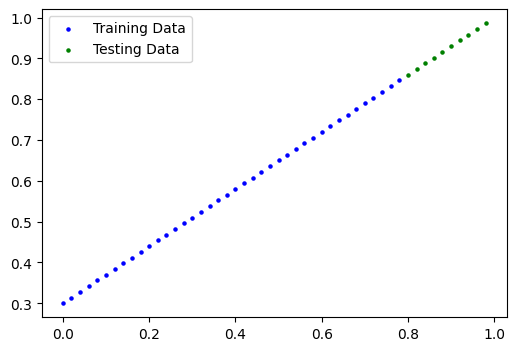

In [96]:
# ideal values
Visualize()

<Figure size 640x480 with 0 Axes>

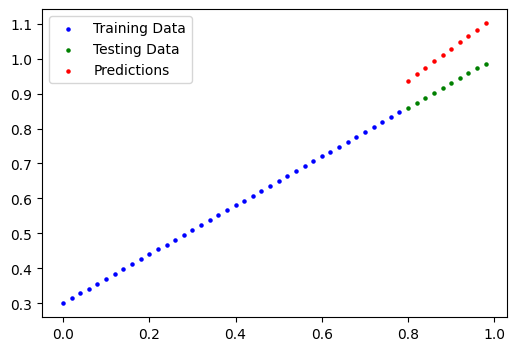

In [99]:
# to make predictions using our model we use 'with torch.inference_mode()'
with tc.inference_mode(): # also no_grad can be used to make these predictions, although inference_mode is preferred
    y_preds1 = model(X_test)

    # initial prediction
    Visualize(preds=y_preds1)

## Training the Model

In [116]:
# setting up the loss functions and the optimizer (in this case we are using the Adam optimizer)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(params = model.parameters(),lr = 0.02)
epochs = 200

for epoch in range(epochs):

    # Step 1 is to set the model to training mode -> all the gradient_true parameters will be changed i.e turns on gradient tracking
    model.train()

    # Step 2 Conduct the Forward pass
    y_preds = model(X_train)

    # Step 3 Calculate the loss
    loss = loss_fn(y_preds, y_train)
    # print("The loss is : ", loss)
    # Step 3 Optimizer Zero Grad
    optimizer.zero_grad() # starts fresh with each new epoch so that the gradients are calculated again

    # Step 4 Perform backpropagation
    loss.backward()

    # Step 5 Perform Gradient Descent and always comes after the backward method
    optimizer.step()

    model.eval()  # turns of settings in the model not needed for evaliation/testing
    with tc.inference_mode():
        # 1. Do the forward pass
        test_preds = model(X_test)

        # 2. Calculate the test loss
        test_loss = loss_fn(test_preds, y_test)
    if epoch % 10 == 0:
        print(f"For epoch {epoch}\t | Loss: {loss} \t\t | Test Loss: {test_loss}")
        print(model.state_dict())

For epoch 0	 | Loss: 0.002439218107610941 		 | Test Loss: 0.009815514087677002
OrderedDict({'weights': tensor([0.8904]), 'bias': tensor([0.2290])})
For epoch 10	 | Loss: 4.327721399022266e-05 		 | Test Loss: 7.703098162892275e-06
OrderedDict({'weights': tensor([0.7114]), 'bias': tensor([0.2925])})
For epoch 20	 | Loss: 0.00015654493472538888 		 | Test Loss: 0.0005997075932100415
OrderedDict({'weights': tensor([0.6467]), 'bias': tensor([0.3232])})
For epoch 30	 | Loss: 1.4366390132636297e-05 		 | Test Loss: 3.860731885652058e-05
OrderedDict({'weights': tensor([0.6893]), 'bias': tensor([0.3033])})
For epoch 40	 | Loss: 1.9987288396805525e-05 		 | Test Loss: 9.677647904027253e-05
OrderedDict({'weights': tensor([0.7195]), 'bias': tensor([0.2924])})
For epoch 50	 | Loss: 1.0915246093645692e-06 		 | Test Loss: 2.080846570606809e-06
OrderedDict({'weights': tensor([0.7023]), 'bias': tensor([0.2994])})
For epoch 60	 | Loss: 3.2073289730760735e-06 		 | Test Loss: 1.3647368177771568e-05
OrderedDi

0.9999999999819837


<Figure size 640x480 with 0 Axes>

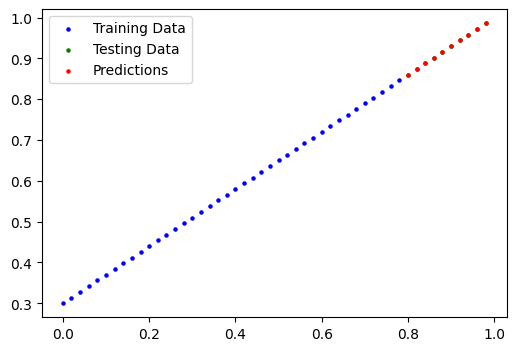

In [112]:
with tc.inference_mode():
    y_preds = model(X_test)
    print(r2_score(y_preds, y_test))
Visualize(preds=y_preds)

In [103]:
# saving the model
tc.save(model, f="model")

In [104]:
a = tc.load(f="model")

In [105]:
print(a)

LRModel()
